In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Préparation des données

In [2]:
cust = pd.read_csv('customers.csv')
prod = pd.read_csv('products.csv')
tran = pd.read_csv('transactions.csv')

>> ### <br> Exploration de 'customers.csv':

In [3]:
cust.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [4]:
print(cust.client_id.shape)
print(cust.client_id.unique().shape)
print(cust.duplicated().sum())

(8623,)
(8623,)
0


In [5]:
cust.sex.unique()

array(['f', 'm'], dtype=object)

In [6]:
print(cust.birth.min())
print(cust.birth.max())

1929
2004


<font color='green'>
Unicité de 'client_id' <br>
Pas de valeurs manquantes <br>
Pas de valeurs aberrantes ni dans 'sex', ni dans 'birth' <br>
</font>
<br>

>> ### Exploration de 'products.csv':

In [7]:
prod.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

In [8]:
prod['categ'] = prod['categ'].astype('string')

In [9]:
prod.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [10]:
print(prod.id_prod.shape)
print(prod.id_prod.unique().shape)
print(prod.id_prod.duplicated().sum())

(3287,)
(3287,)
0


In [11]:
print(prod.price.min())
print(prod.price.max())

-1.0
300.0


In [12]:
prod.sort_values('price').head()

,id_prod,price,categ
731,T_0,-1.00,0
2355,0_202,0.62,0
2272,0_528,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0


In [13]:
prod.categ.unique()

<StringArray>
['0', '1', '2']
Length: 3, dtype: string

<font color='green'> 
    Unicité de 'id_prod' <br>
1 prix négatif avec un id_prod 'T_0'. Sans doute un test.
<br>
<br>
Je supprime la ligne:
    </font>

In [14]:
prod = prod.drop(prod.index[[731]])

<br>

>> ### Exploration de 'transactions.csv':

In [15]:
tran.shape

(679532, 4)

In [16]:
tran.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [17]:
tran.nunique()

id_prod         3267
date          679371
session_id    342316
client_id       8602
dtype: int64

In [18]:
tran.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

<font color='green'>
    Format de 'date' incorrect.
<br>
<br>
Formatage:
</font>

<font color='green'>pd.to_datetime(tran['date'])
renvoie une erreur: test_...
</font>

In [19]:
lignes_test = tran.loc[tran['date'].str.contains('test')]
lignes_test

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


<font color='green'>
Les lignes de tests indiquent les valeurs suivantes: id_prod: T_0 / client_id: ct_0 et ct_1>
<br> 
<br> 
Avant de les supprimer, je vais vérifier que le produit 'T_0' et les clients 'ct_0' et 'ct_1' ne sont effectivement utilisés que pour les tests:
</font>

In [20]:
id_prod_test =  tran.loc[tran['id_prod'] == 'T_0']
client_id_test =  tran.loc[tran['client_id'].isin(['ct_0', 'ct_1'])]
print(id_prod_test)
print(client_id_test)

       id_prod                             date session_id client_id
3019       T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0
5138       T_0  test_2021-03-01 02:30:02.237425        s_0      ct_0
9668       T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
10728      T_0  test_2021-03-01 02:30:02.237436        s_0      ct_0
15292      T_0  test_2021-03-01 02:30:02.237430        s_0      ct_0
...        ...                              ...        ...       ...
657830     T_0  test_2021-03-01 02:30:02.237417        s_0      ct_0
662081     T_0  test_2021-03-01 02:30:02.237427        s_0      ct_1
670680     T_0  test_2021-03-01 02:30:02.237449        s_0      ct_1
671647     T_0  test_2021-03-01 02:30:02.237424        s_0      ct_1
679180     T_0  test_2021-03-01 02:30:02.237425        s_0      ct_1

[200 rows x 4 columns]
       id_prod                             date session_id client_id
3019       T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0
5138      

<font color='green'>
    Les 'T_0' et les 'ct_0' et 'ct_1' ne sont effectivement utilsés que pour des tests (200 lignes).
<br>
<br>
Je supprime les 200 lignes de test:
   </font> 

In [21]:
tran = tran.drop(tran[tran['id_prod']=='T_0'].index)

<br>
<font color='green'>
Je supprime les valeurs 'ct_0' et 'ct_1 dans 'cust.client_id':
</font>

In [22]:
cust = cust.drop(cust[cust['client_id'].isin(['ct_0', 'ct_1'])].index)

<br>
<font color='green'>
Le formatage est désormais possible:
    </font>

In [23]:
tran['date'] = pd.to_datetime(tran['date'])

In [24]:
tran.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

<br>

>> ### Jointures:

In [25]:
print(cust.client_id.unique().shape)
print(tran.client_id.unique().shape)
print(''     '')
print(prod.id_prod.unique().shape)
print(tran.id_prod.unique().shape)

(8621,)
(8600,)

(3286,)
(3266,)


>>> #### 1. customers - transactions :

In [26]:
cust_tran = pd.merge(cust, tran, on = 'client_id', how='outer')
cust_tran.shape

(679353, 6)

In [27]:
cust_tran.isnull().sum()

client_id      0
sex            0
birth          0
id_prod       21
date          21
session_id    21
dtype: int64

<font color='green'>
    21 références clients n'ont pas de données de transactions.
</font>

>>> #### 2. cust_tran - products:

In [28]:
lapage_df = pd.merge(cust_tran, prod, on='id_prod', how='outer')
lapage_df.shape

(679374, 8)

<font color='green'>
    Création d'une colonne 'age':
    </font>

In [29]:
lapage_df['age'] = 2022 - lapage_df['birth']

In [30]:
lapage_df.isnull().sum()

client_id      21
sex            21
birth          21
id_prod        21
date           42
session_id     42
price         242
categ         242
age            21
dtype: int64

<font color='green'>
    242 lignes de 'transaction' n'ont pas de correspondance dans 'product'
</font>
<br>
<br>

In [31]:
les_242 = lapage_df.loc[lapage_df['price'].isnull()]
les_242.isnull().sum()

client_id       0
sex             0
birth           0
id_prod        21
date           21
session_id     21
price         242
categ         242
age             0
dtype: int64

In [32]:
les_242.loc[les_242.date.isnull()].shape

(21, 9)

<font color='green'>
    21 valeurs 'prod.id_prod' n'ont pas de données de transaction (= pas vendus)
</font>
<br>
<br>

In [33]:
les_221 = les_242.loc[les_242.date.notnull()]
les_221.shape

(221, 9)

In [34]:
les_221.isnull().sum()

client_id       0
sex             0
birth           0
id_prod         0
date            0
session_id      0
price         221
categ         221
age             0
dtype: int64

In [35]:
tran.loc[tran.id_prod=='0_2245']

,id_prod,date,session_id,client_id
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746
10106,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713
11727,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108
15675,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391
16377,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954
...,...,...,...,...
669730,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131
670682,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167
671286,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453
675679,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098


In [36]:
les_221.id_prod.unique()

array(['0_2245'], dtype=object)

<br>
<font color='green'>
1 'id_product' (0_2245) de 'transaction' n'a pas de correspondance dans 'product' (= oubli ?).

Ce produit a été vendu 221 fois.

Cette référence est de catégorie 0 ("0_"):
    </font>

In [37]:
lapage_df.loc[lapage_df.id_prod == '0_2245', 'categ']='0'

<font color='green'>
Je vais remplacer la valeur prix manquante de cette référence par le prix médian de sa catégorie:
    </font>

In [38]:
lapage_df_cat0 = lapage_df.loc[lapage_df.categ=='0']

In [39]:
lapage_df_cat0 = lapage_df_cat0.drop_duplicates('id_prod')

In [40]:
med = lapage_df_cat0.price.median()

In [41]:
lapage_df.loc[lapage_df.id_prod == '0_2245', 'price']=med

In [42]:
lapage_df.isnull().sum()

client_id     21
sex           21
birth         21
id_prod       21
date          42
session_id    42
price         21
categ         21
age           21
dtype: int64

<br>
<br>
<hr>

# Demandes d'Antoine

> ## Indicateurs et graphiques autour du chiffre d'affaires

>> ### Calcul du chiffre d'affaires:

In [43]:
lapage_df.shape

(679374, 9)

In [44]:
ventes_lapage = lapage_df.loc[lapage_df['date'].notnull()]
CA = ventes_lapage['price'].sum()
print('Le chiffre d\'affaires est de {:.2f}€'.format(CA))

Le chiffre d'affaires est de 11856009.40€


>> ### Calcul du chiffre d'affaires par catégorie de produits:

In [45]:
ventes_cat0 = ventes_lapage.loc[ventes_lapage['categ'] == '0']
ventes_cat1 = ventes_lapage.loc[ventes_lapage['categ'] == '1']
ventes_cat2 = ventes_lapage.loc[ventes_lapage['categ'] == '2']

In [46]:
CA0 = ventes_cat0['price'].sum()
CA1 = ventes_cat1['price'].sum()
CA2 = ventes_cat2['price'].sum()

print('Le chiffre d\'affaires pour la catégorie 0 est de {:.2f}€'.format(CA0))
print('Le chiffre d\'affaires pour la catégorie 1 est de {:.2f}€'.format(CA1))
print('Le chiffre d\'affaires pour la catégorie 2 est de {:.2f}€'.format(CA2))

Le chiffre d'affaires pour la catégorie 0 est de 4422011.69€
Le chiffre d'affaires pour la catégorie 1 est de 4653722.69€
Le chiffre d'affaires pour la catégorie 2 est de 2780275.02€


>> ### Répartition du CA par catégories de produits:

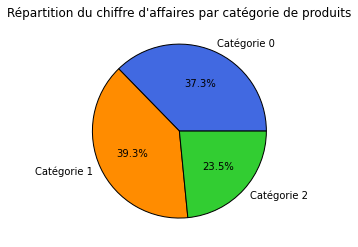

In [47]:
plt.figure()
plt.title('Répartition du chiffre d\'affaires par catégorie de produits')
slices = [CA0, CA1, CA2]
labels = ['Catégorie 0', 'Catégorie 1', 'Catégorie 2']
colors = ['royalblue', 'darkorange', 'limegreen']
plt.pie(slices, labels=labels, colors=colors, autopct='%.1f%%', wedgeprops={'edgecolor': 'black'})
plt.savefig('Répartition.png', bbox_inches='tight')
plt.show()

>> ### Distribution du CA selon l'âge:

In [48]:
CA_par_client = pd.DataFrame(ventes_lapage.groupby(['age'])['price'].sum())

In [49]:
CA_par_client.reset_index(inplace=True)

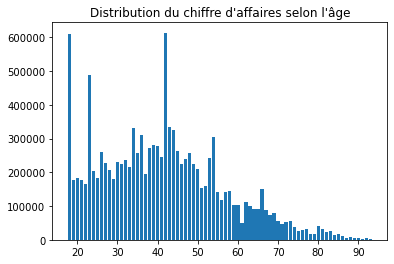

In [50]:
plt.figure()
plt.title("Distribution du chiffre d'affaires selon l'âge")
plt.bar(CA_par_client['age'], CA_par_client['price'])
plt.show()

>> ### Répartition du CA selon le genre des clients :

In [51]:
ventes_f = ventes_lapage.loc[ventes_lapage['sex'] == 'f']
CA_femmes = ventes_f['price'].sum()
ventes_h = ventes_lapage.loc[ventes_lapage['sex'] == 'm']
CA_hommes = ventes_h['price'].sum()
part_CA_femmes = (CA_femmes/CA)*100
part_CA_hommes = (CA_hommes/CA)*100
print('Le chiffre d\'affaires des clients de sexe féminin: {:.2f}%'.format(part_CA_femmes))
print('Le chiffre d\'affaires des clients de sexe masculin: {:.2f}%'.format(part_CA_hommes))

Le chiffre d'affaires des clients de sexe féminin: 49.43%
Le chiffre d'affaires des clients de sexe masculin: 50.57%


>> ### Répartition du CA par produits:

In [52]:
def gini(arr):
    count = arr.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

def lorenz(arr):
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    return np.insert(scaled_prefix_sum, 0, 0)

In [53]:
CA_pdts = pd.DataFrame(ventes_lapage.groupby('id_prod') ['price'].sum())

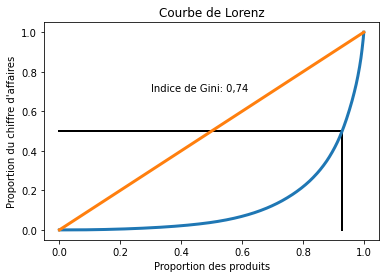

In [54]:
arr = np.array(CA_pdts.price.sort_values())

lorenz_curve = lorenz(arr)
medial = lorenz(arr)[(lorenz(arr) < 0.5)].size / lorenz(arr).size
plt.title('Courbe de Lorenz')
plt.xlabel('Proportion des produits')
plt.ylabel("Proportion du chiffre d'affaires")
plt.plot([0,medial],[0.5,0.5], color='k', linewidth=2)
plt.plot([medial,medial],[0,0.5], color='k', linewidth=2)
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve, linewidth=3)
plt.plot([0,1], [0,1], linewidth=3)
plt.text(0.3, 0.7, 'Indice de Gini: 0,74')
plt.savefig("Répartition CA-Pdt (Lorenz).png", bbox_inches='tight')
plt.show()

In [55]:
print(gini(arr))

0.7428361592956254


<br>
<br>

> ## Evolution dans le temps

In [56]:
print(lapage_df['date'].min())
print(lapage_df['date'].max())

2021-03-01 00:01:07.843138
2023-02-28 23:58:30.792755


>> ### Evolution CA et CA/catégories:

In [57]:
lapage_CA_quot = ventes_lapage.groupby(pd.Grouper(key='date', freq='D')).sum()
lapage_CA_quot_cat0 = ventes_cat0.groupby(pd.Grouper(key='date', freq='D')).sum()
lapage_CA_quot_cat1 = ventes_cat1.groupby(pd.Grouper(key='date', freq='D')).sum()
lapage_CA_quot_cat2 = ventes_cat2.groupby(pd.Grouper(key='date', freq='D')).sum()

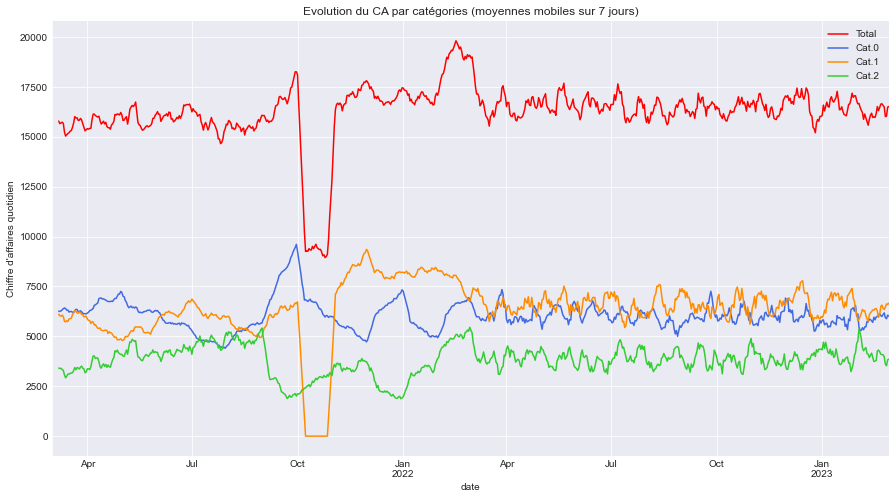

In [58]:
plt.figure(figsize = (15,8))
plt.style.use('seaborn-darkgrid')
plt.title('Evolution du CA par catégories (moyennes mobiles sur 7 jours)')
plt.ylabel('Chiffre d\'affaires quotidien')
lapage_CA_quot['price'].rolling(window=7).mean().plot(color='r')
lapage_CA_quot_cat0['price'].rolling(window=7).mean().plot(color='royalblue')
lapage_CA_quot_cat1['price'].rolling(window=7).mean().plot(color='darkorange')
lapage_CA_quot_cat2['price'].rolling(window=7).mean().plot(color='limegreen')
plt.legend(['Total', 'Cat.0', 'Cat.1', 'Cat.2'])
plt.savefig('Evolution CA-Cat.png', bbox_inches='tight')
plt.show()

<font color='green'>
CA des produits de la catégorie 1 nul en octobre 2021. Pourquoi ?
</font>

In [59]:
arret_ventes = lapage_CA_quot_cat1.loc[lapage_CA_quot_cat1['price']==0].sort_values('date')

In [60]:
print(arret_ventes.index.min())
print(arret_ventes.index.max())

2021-10-02 00:00:00
2021-10-27 00:00:00


<font color='green'>
L'arrêt des ventes s'est produit entre le 2 et le 27 octobre 2021 
</font>

<br>
<font color='green'>
Je crée un DataFrame alternatif où je supprime toutes les ventes effectuées au mois d'octobre 2021. Je l'utiliserai pour les analyses ultérieures concernant les ventes par catégories:
</font>

In [61]:
lapage_ss_oct = lapage_df.loc[(lapage_df['date'] < '2021-10-01')
                     | (lapage_df['date'] > '2021-10-31')]

>> ### Evolution CA/genre:

In [62]:
lapage_CA_quot_f = ventes_f.groupby(pd.Grouper(key='date', freq='D')).sum()
lapage_CA_quot_h = ventes_h.groupby(pd.Grouper(key='date', freq='D')).sum()

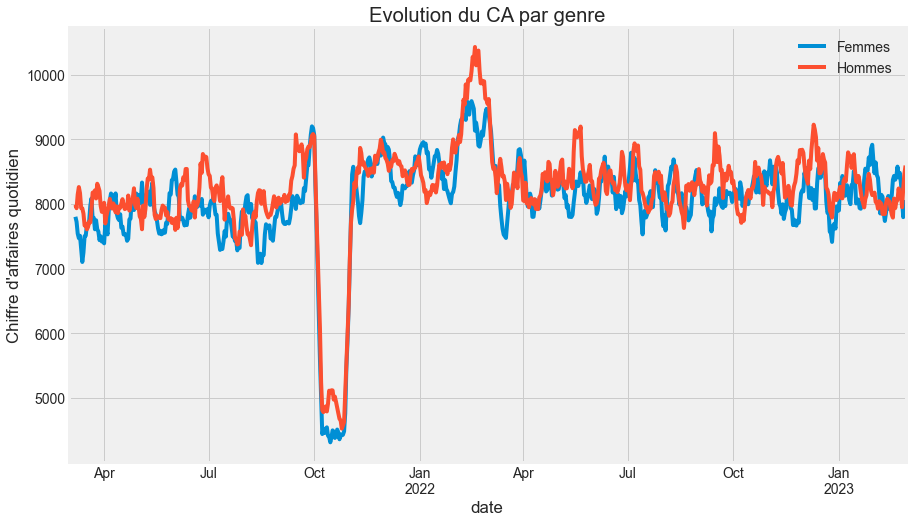

In [63]:
plt.figure(figsize = (15,8))
plt.style.use("fivethirtyeight")
plt.title('Evolution du CA par genre')
plt.ylabel('Chiffre d\'affaires quotidien')
lapage_CA_quot_f['price'].rolling(window=7).mean().plot()
lapage_CA_quot_h['price'].rolling(window=7).mean().plot()
plt.legend(['Femmes', 'Hommes'])
plt.show()

>> ### Evolution Ventes/genre:

In [64]:
lapage_ventes_quot_f = ventes_f.groupby(pd.Grouper(key='date', freq='D')).count()
lapage_ventes_quot_h = ventes_h.groupby(pd.Grouper(key='date', freq='D')).count()

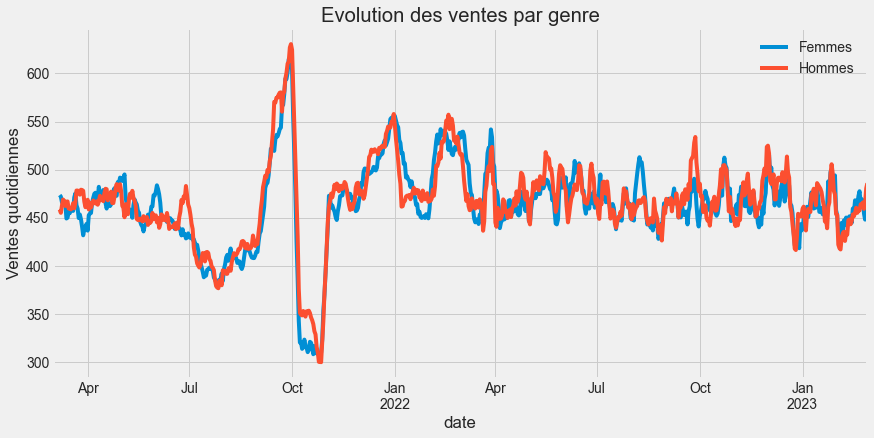

In [65]:
plt.figure(figsize = (13,6))
plt.style.use("fivethirtyeight")
plt.title('Evolution des ventes par genre')
plt.ylabel('Ventes quotidiennes')
lapage_ventes_quot_f['price'].rolling(window=7).mean().plot()
lapage_ventes_quot_h['price'].rolling(window=7).mean().plot()
plt.legend(['Femmes', 'Hommes'])
plt.show()

>> ### Evolution CA/âge:

In [66]:
ventes_18_30 = ventes_lapage.loc[ventes_lapage['age']<30]
ventes_30_50 = ventes_lapage.loc[(ventes_lapage['age']>=30) & (ventes_lapage['age']<50)]
ventes_50_plus = ventes_lapage.loc[ventes_lapage['age']>=50]

In [67]:
lapage_CA_quot_18_30 = ventes_18_30.groupby(pd.Grouper(key='date', freq='D')).sum()
lapage_CA_quot_30_50 = ventes_30_50.groupby(pd.Grouper(key='date', freq='D')).sum()
lapage_CA_quot_50_plus = ventes_50_plus.groupby(pd.Grouper(key='date', freq='D')).sum()

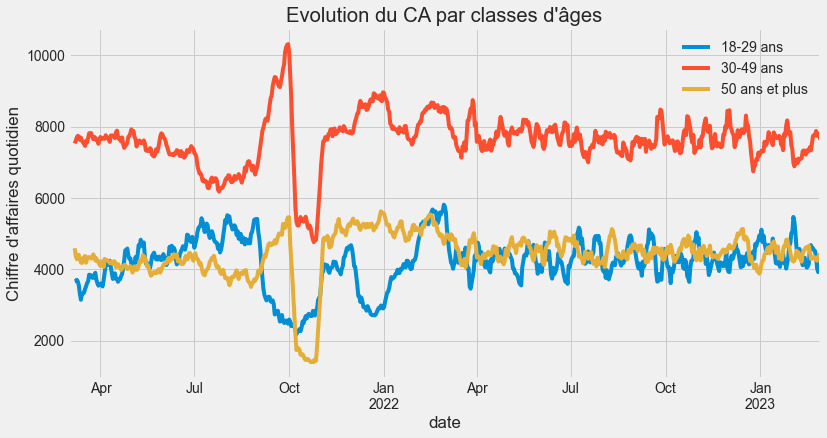

In [68]:
plt.figure(figsize = (12,6))
plt.style.use("fivethirtyeight")
plt.title('Evolution du CA par classes d\'âges')
plt.ylabel('Chiffre d\'affaires quotidien')
lapage_CA_quot_18_30['price'].rolling(window=7).mean().plot()
lapage_CA_quot_30_50['price'].rolling(window=7).mean().plot()
lapage_CA_quot_50_plus['price'].rolling(window=7).mean().plot()
plt.legend(['18-29 ans', '30-49 ans', '50 ans et plus'])
plt.show()

<br>
<br>

> ## Zoom sur les références

>> ### Prix par catégories:

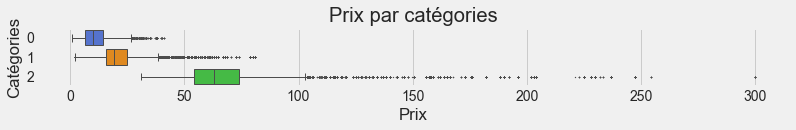

In [69]:
plt.figure(figsize=(12,1))
colors=['royalblue', 'darkorange', 'limegreen']
ax = sns.boxplot(x=lapage_df.price, y=lapage_df.categ, orient='h', palette=colors, flierprops = dict(markersize = 0.5), linewidth=1)
ax.set(xlabel='Prix', ylabel='Catégories', title='Prix par catégories')
plt.savefig('Boxplot Prix-Categ.png', bbox_inches='tight')
plt.show()

>> ### Tops:

In [70]:
top10_CA = pd.DataFrame(ventes_lapage.groupby('id_prod')['price'].sum().sort_values(ascending=False)).head(10)
top10_ventes = pd.DataFrame(ventes_lapage.groupby('id_prod')['session_id'].count().sort_values(ascending=False)).head(10)

>>> #### Tops en CA:

In [71]:
top10_CA.rename(columns={'price': 'CA'}, inplace=True)

In [72]:
top10_CA = pd.merge(top10_CA, prod, on='id_prod', how='left')
top10_CA

,id_prod,CA,price,categ
0,2_159,94893.50,145.99,2
1,2_135,69334.95,68.99,2
2,2_112,65407.76,67.57,2
3,2_102,60736.78,59.14,2
4,2_209,56971.86,69.99,2
5,1_395,54356.25,28.99,1
6,1_369,54025.48,23.99,1
7,2_110,53846.25,62.25,2
8,2_39,53060.85,57.99,2
9,2_166,52449.12,230.04,2


>>> #### Tops en CA/catégories:

In [73]:
top10_cat0 = pd.DataFrame(ventes_cat0.groupby('id_prod')['price'].sum().sort_values(ascending=False)).head(10)
top10_cat1 = pd.DataFrame(ventes_cat1.groupby('id_prod')['price'].sum().sort_values(ascending=False)).head(10)
top10_cat2 = pd.DataFrame(ventes_cat2.groupby('id_prod')['price'].sum().sort_values(ascending=False)).head(10)

In [74]:
top10_cat0.reset_index(inplace=True)
top10_cat1.reset_index(inplace=True)
top10_cat2.reset_index(inplace=True)

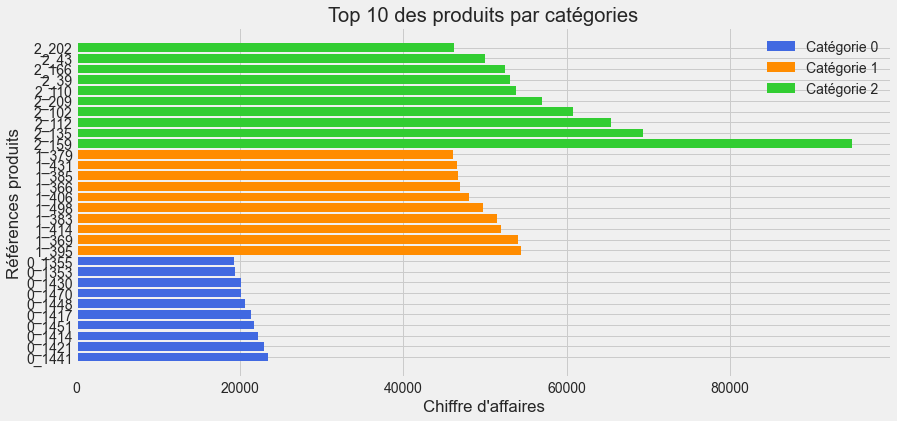

In [75]:
plt.figure(figsize=(13,6))
plt.title("Top 10 des produits par catégories")
plt.xlabel("Chiffre d'affaires")
plt.ylabel('Références produits')
plt.barh(top10_cat0.id_prod, top10_cat0.price, color='royalblue')
plt.barh(top10_cat1.id_prod, top10_cat1.price, color='darkorange')
plt.barh(top10_cat2.id_prod, top10_cat2.price, color='limegreen')
plt.legend(['Catégorie 0', 'Catégorie 1', 'Catégorie 2'])
plt.savefig('Bar Top10_CA-Cat.png', bbox_inches='tight')
plt.show()

>>> #### Tops en ventes:

In [76]:
top10_ventes.rename(columns={'session_id': 'Ventes'}, inplace=True)

In [77]:
top10_ventes = pd.merge(top10_ventes, prod, on='id_prod', how='left')
top10_ventes

,id_prod,Ventes,price,categ
0,1_369,2252,23.99,1
1,1_417,2189,20.99,1
2,1_414,2180,23.83,1
3,1_498,2128,23.37,1
4,1_425,2096,16.99,1
5,1_403,1960,17.99,1
6,1_412,1951,16.65,1
7,1_413,1945,17.99,1
8,1_406,1939,24.81,1
9,1_407,1935,15.99,1


>> ### Flops:

Recherche de références sans vente:

In [78]:
flop10_CA = lapage_df.loc[(lapage_df['date'].isnull()) & (lapage_df['id_prod'].notnull())]
flop10_CA[['id_prod', 'price', 'categ']].sort_values('categ')

,id_prod,price,categ
679353,0_1016,35.06,0
679371,0_299,22.99,0
679369,0_1624,24.50,0
679368,0_310,1.94,0
679364,0_1025,24.99,0
679372,0_510,23.66,0
679362,0_322,2.99,0
679361,0_1645,2.99,0
679363,0_1620,0.80,0
679359,0_1318,20.92,0


>> ### Répartition des références par catégorie de produits:

In [79]:
lapage_df_cat0 = lapage_df.loc[lapage_df['categ'] == '0']
lapage_df_cat1 = lapage_df.loc[lapage_df['categ'] == '1']
lapage_df_cat2 = lapage_df.loc[lapage_df['categ'] == '2']

In [80]:
ref0 = lapage_df_cat0['id_prod'].unique().shape
ref1 = lapage_df_cat1['id_prod'].unique().shape
ref2 = lapage_df_cat2['id_prod'].unique().shape

In [81]:
cat = [(0, ref0),(1, ref1),(2,ref2)]
for i in cat:
    print('Catégorie {}: {} références'.format(i[0], i[1][0]))

Catégorie 0: 2309 références
Catégorie 1: 739 références
Catégorie 2: 239 références


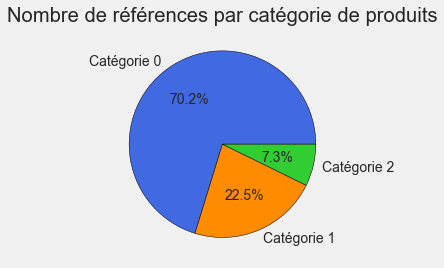

In [82]:
plt.figure()
plt.title('Nombre de références par catégorie de produits')
slices = [ref0[0], ref1[0], ref2[0]]
labels = ['Catégorie 0', 'Catégorie 1', 'Catégorie 2']
colors = ['royalblue', 'darkorange', 'limegreen']
plt.pie(slices, labels=labels, colors=colors, autopct='%.1f%%', wedgeprops={'edgecolor': 'black'})
plt.savefig('Pie Réf-Cat.png', bbox_inches='tight')
plt.show()

<br>
<br>
<br>

> ## Profil des clients:

>> ### Top 10 clients:

In [83]:
classement_clients = pd.DataFrame(lapage_df.groupby('client_id')['price'].sum().sort_values(ascending=False))
classement_clients.head(10)

,price
client_id,
c_1609,324033.35
c_4958,289760.34
c_6714,153660.84
c_3454,113668.89
c_3263,5276.87
c_1570,5271.62
c_2899,5214.05
c_2140,5208.82
c_7319,5155.77


<font color='green'>
    4 clients sortent très largement du lot et risquent de fausser les analyses
    <font>

In [84]:
top10_clients = classement_clients.head(10)

In [85]:
top10_clients = top10_clients.reset_index()

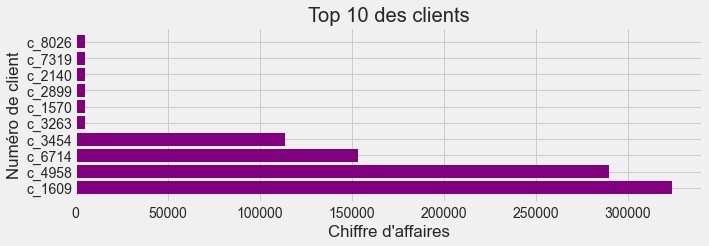

In [86]:
plt.figure(figsize=(10,3))
plt.title('Top 10 des clients')
plt.xlabel("Chiffre d'affaires")
plt.ylabel('Numéro de client')
plt.barh(top10_clients.client_id, top10_clients.price, color='purple')
plt.savefig('Top10 clients.png', bbox_inches='tight')
plt.show()

>>> #### Part de ces 4 clients dans le CA total:

In [87]:
top4_clients = top10_clients.head(4)

In [88]:
print('Ces 4 clients représentent {:.2f} % du chiffre d\'affaires'.format(top4_clients.price.sum()/CA*100))

Ces 4 clients représentent 7.43 % du chiffre d'affaires


<font color='green'>
Le risque est grand de fausser les analyses ultérieures avec ces 4 clients inhabituels, manifestement des professionnels. Création d'un dataframe les excluant:
</font>

In [89]:
id_des_4 = pd.Series(top4_clients['client_id'].unique())

In [90]:
lapage_ss4 = lapage_df.drop(lapage_df[lapage_df.client_id.isin(id_des_4)].index)

>>> #### Aperçu des achats du plus gros client:

In [92]:
lapage_df.loc[lapage_df.client_id=='c_1609'].id_prod.value_counts().head(10)

0_1438    95
0_1360    79
0_1334    78
0_1424    75
0_1411    73
0_1461    73
0_1465    71
0_1470    70
0_1453    69
0_1377    66
Name: id_prod, dtype: int64

>>> #### Aperçu des achats du 10è plus gros client:

In [93]:
lapage_df.loc[lapage_df.client_id=='c_8026'].id_prod.value_counts().head(10)

0_1410    7
0_1040    7
0_1376    6
0_1451    6
0_1392    5
0_1473    5
0_571     4
1_316     4
0_625     4
0_2037    4
Name: id_prod, dtype: int64

<font color='green'>
Même le 10è ne semble pas être un particulier, mais plutôt un professionnel. Cela risque de fausser les analyses ultérieures. Il serait intéressant de qualifier chaque client: particulier ou professionnel. Sur quels critères? Ne fait jamais 3 achats d'un même article. Ou de ne compter chaque référence qu'une fois maximum pour chaque client pour certaines analyses.
<br>
</font>

>> ### Répartition hommes-femmes:

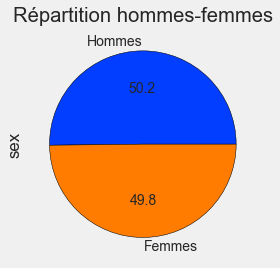

In [94]:
rep_HF = lapage_df['sex'].value_counts(normalize=True)
plt.title('Répartition hommes-femmes')
labels = ['Hommes', 'Femmes']
colors = sns.color_palette('bright')
rep_HF.plot(kind='pie', autopct='%.1f', labels=labels, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.savefig('Pie H-F.png', bbox_inches='tight')
plt.show()

>> ### Age moyen, âge médian:

In [95]:
print('L\'âge moyen des clients est de {:.2f}'.format(lapage_df.age.mean()))
print('L\'âge médian des clients est de {}'.format(lapage_df.age.median()))

L'âge moyen des clients est de 44.19
L'âge médian des clients est de 42.0


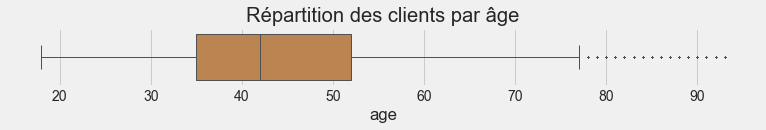

In [96]:
plt.figure(figsize=(12,1))
plt.title('Répartition des clients par âge')
sns.boxplot(x=lapage_df.age, flierprops = dict(markersize = 0.5), linewidth=1, color='peru')
plt.savefig('Box Age.png', bbox_inches='tight')
plt.show()

>> ### Répartition par âge des clients:

In [97]:
lapage_df_18_30 = lapage_df.loc[lapage_df['age']<30]
lapage_df_30_50 = lapage_df.loc[(lapage_df['age']>=30) & (lapage_df['age']<50)]
lapage_df_50_plus = lapage_df.loc[lapage_df['age']>=50]

In [98]:
eff_18_30 = lapage_df_18_30['client_id'].unique().shape[0]
eff_30_50 = lapage_df_30_50['client_id'].unique().shape[0]
eff_50_plus = lapage_df_50_plus['client_id'].unique().shape[0]

In [99]:
print('18-30 ans: {} clients'.format(eff_18_30))
print('30-50 ans: {} clients'.format(eff_30_50))
print('50 ans et plus: {} clients'.format(eff_50_plus))

18-30 ans: 2092 clients
30-50 ans: 3413 clients
50 ans et plus: 3116 clients


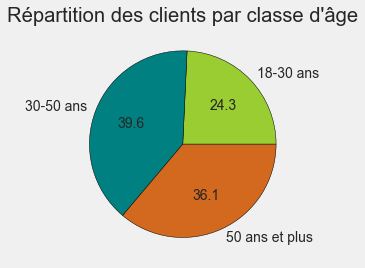

In [100]:
plt.figure()
plt.title('Répartition des clients par classe d\'âge')
slices = [eff_18_30, eff_30_50, eff_50_plus]
labels = ['18-30 ans', '30-50 ans', '50 ans et plus']
colors = ['yellowgreen', 'teal', 'chocolate']
plt.pie(slices, labels=labels, autopct='%.1f', colors=colors, wedgeprops={'edgecolor': 'black'})
plt.savefig("Pie Classe d'âge.png", bbox_inches='tight')
plt.show()

In [101]:
repartition_clients = lapage_df.drop_duplicates('client_id')

In [102]:
repartition_clients = pd.DataFrame(repartition_clients.groupby('age') ['client_id'].count())

In [103]:
repartition_clients = repartition_clients.reset_index()

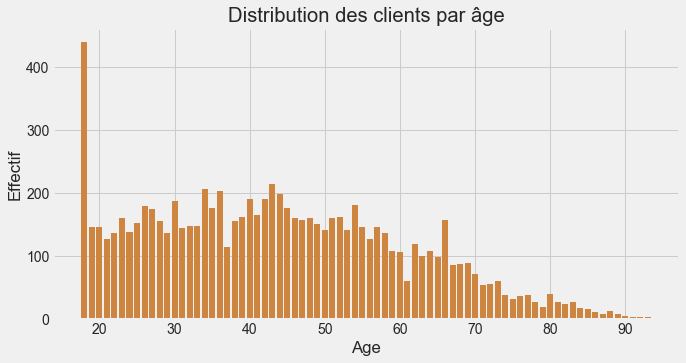

In [104]:
plt.figure(figsize=(10,5))
plt.title('Distribution des clients par âge')
plt.xlabel('Age')
plt.ylabel('Effectif')
plt.bar(repartition_clients.age, repartition_clients.client_id, color='peru')
plt.savefig("Bar Age.png", bbox_inches='tight')
plt.show()

<font color='green'>
Le nombre  de clients âgés de 18 ans est anormalement élevé    
<br>
</font>

>> ### Répartition du CA entre les clients:

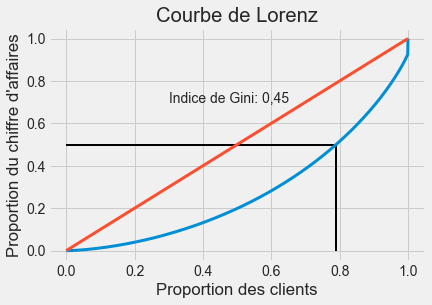

In [105]:
arr = np.array(classement_clients.price.sort_values())

lorenz_curve = lorenz(arr)
medial = lorenz(arr)[(lorenz(arr) < 0.5)].size / lorenz(arr).size
plt.title('Courbe de Lorenz')
plt.xlabel('Proportion des clients')
plt.ylabel("Proportion du chiffre d'affaires")
plt.plot([0,medial],[0.5,0.5], color='k', linewidth=2)
plt.plot([medial,medial],[0,0.5], color='k', linewidth=2)
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve, linewidth=3)
plt.plot([0,1], [0,1], linewidth=3)
plt.text(0.3, 0.7, 'Indice de Gini: 0,45')
plt.savefig("Lorenz avec 4.png", bbox_inches='tight')
plt.show()

In [106]:
print(gini(arr))

0.4477437505628634


>>> #### Répartition si on exclut les 4 plus gros clients:

In [107]:
classement_clients = pd.DataFrame(lapage_df.groupby('client_id')['price'].sum().sort_values(ascending=False))

In [108]:
classement_clients_ss4 = pd.DataFrame(lapage_ss4.groupby('client_id')['price'].sum().sort_values(ascending=False))

In [109]:
arr = np.array(classement_clients_ss4.price.sort_values())

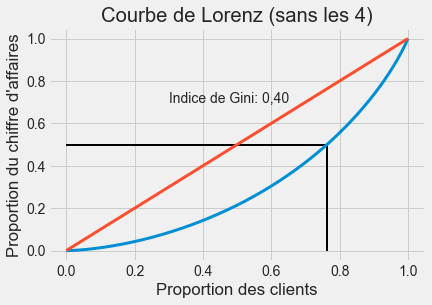

In [110]:
lorenz_curve = lorenz(arr)
medial = lorenz(arr)[(lorenz(arr) < 0.5)].size / lorenz(arr).size
plt.title("Courbe de Lorenz (sans les 4)")
plt.xlabel('Proportion des clients')
plt.ylabel("Proportion du chiffre d'affaires")
plt.plot([0,medial],[0.5,0.5], color='k', linewidth=2)
plt.plot([medial,medial],[0,0.5], color='k', linewidth=2)
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve, linewidth=3)
plt.plot([0,1], [0,1], linewidth=3)
plt.text(0.3, 0.7, 'Indice de Gini: 0,40')
plt.savefig("Lorenz sans 4.png", bbox_inches='tight')
plt.show()

In [111]:
print(gini(arr))

0.4040862361573787


<br>
<br>
<hr>

# Demandes de Julie

In [112]:
lapage_ss4_ss_oct = lapage_ss4.loc[(lapage_ss4['date'] < '2021-10-01')
                     | (lapage_ss4['date'] > '2021-10-31')]

<font color='green'>
<br />
lapage_df: résultat de la jointure finale.
<br>
lapage_ss4_ss_oct: lapage_df sans les 4 gros clients, ni les ventes d'octobre 2021
<br>
</font>

>> ### Lien genre du client / catégorie des livres achetés:

In [113]:
ventes_ss4_ss_oct = lapage_ss4_ss_oct.loc[lapage_ss4_ss_oct['date'].notnull()]

In [114]:
achats_f = ventes_ss4_ss_oct.loc[ventes_ss4_ss_oct.sex=='f']
achats_h = ventes_ss4_ss_oct.loc[ventes_ss4_ss_oct.sex=='m']

In [115]:
achats_f = pd.DataFrame(achats_f.groupby('categ')['sex'].count())
achats_h = pd.DataFrame(achats_h.groupby('categ')['sex'].count())

In [116]:
achats_f=achats_f.reset_index()
achats_h=achats_h.reset_index()

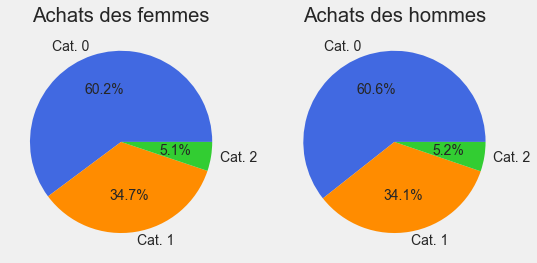

In [117]:
colors = ['royalblue', 'darkorange', 'limegreen']
labels = ['Cat. 0', 'Cat. 1', 'Cat. 2']
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.title('Achats des femmes')
plt.pie(achats_f.sex, labels=labels, autopct = '%0.1f%%', colors=colors)
plt.subplot(1, 2, 2)
plt.title('Achats des hommes')
plt.pie(achats_h.sex, labels=labels, autopct = '%0.1f%%', colors=colors)
plt.savefig("Pie Genre-Cat.png", bbox_inches='tight')
plt.show()

In [118]:
cont_sex_categ = pd.crosstab(ventes_ss4_ss_oct.sex, ventes_ss4_ss_oct.categ, normalize='index')
cont_sex_categ

categ,0,1,2
sex,,,
f,0.601946,0.346555,0.051499
m,0.606348,0.341401,0.052251


In [119]:
cont_sex_categ.index = ["Femmes","Hommes"]

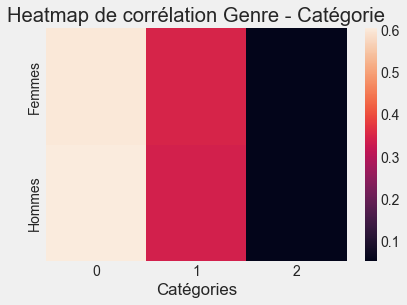

In [120]:
sns.heatmap(cont_sex_categ)
plt.title('Heatmap de corrélation Genre - Catégorie')
plt.xlabel('Catégories')
plt.savefig("Heat Genre-Cat.png", bbox_inches='tight')
plt.show()

Test d'indépendance du chi²:

In [121]:
stats.chi2_contingency(cont_sex_categ)

(6.008585404551043e-05,
 0.9999699575242614,
 2,
 array([[0.60414715, 0.34397801, 0.05187484],
        [0.60414715, 0.34397801, 0.05187484]]))

<font color='green'>
On ne peut pas rejeter HO ("Les variables sont indépendantes: aucune préférence de catégorie selon le sexe")
<br>
<br>
</font>

>> ### Lien âge / montant total des achats:

In [122]:
total_par_client = pd.DataFrame(ventes_ss4_ss_oct.groupby(['client_id', 'age']) ['price'].sum())
total_par_client

,,price
client_id,age,
c_1,67.0,550.19
c_10,66.0,1353.60
c_100,30.0,254.85
c_1000,56.0,2209.92
c_1001,40.0,1720.08
...,...,...
c_995,67.0,189.41
c_996,52.0,1611.59
c_997,28.0,1432.02


In [123]:
montant_age = pd.DataFrame(total_par_client.groupby(['age'])['price'].mean())
montant_age.rename(columns={'price':"Montant total moyen"}, inplace=True)

In [124]:
montant_age = montant_age.reset_index()
montant_age

,age,Montant total moyen
0,18.0,1353.936682
1,19.0,1194.966966
2,20.0,1233.469931
3,21.0,1396.948240
4,22.0,1185.225662
...,...,...
71,89.0,639.285000
72,90.0,805.270000
73,91.0,672.797500
74,92.0,989.810000


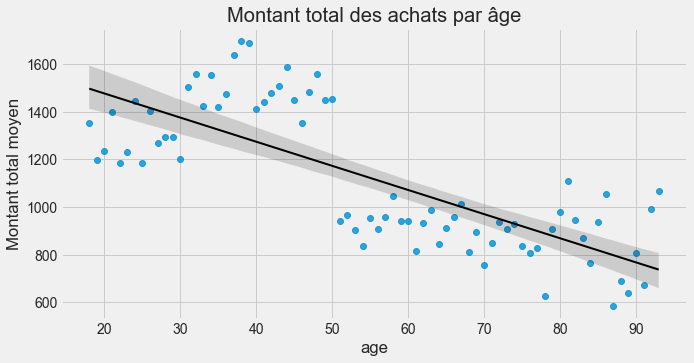

In [125]:
plt.figure(figsize=(10,5))
plt.title('Montant total des achats par âge')
plt.xlabel('Âge')
sns.regplot(x=montant_age.age, y=montant_age["Montant total moyen"], line_kws={"color":"k","alpha":1,"lw":2})
plt.savefig("Scatter Age-Total.png", bbox_inches='tight')
plt.show()

<br>
Tests de normalité:

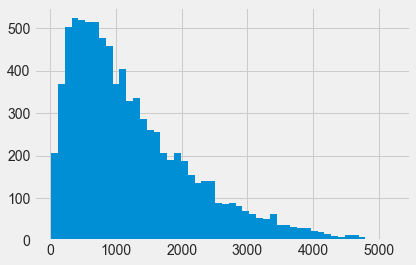

In [126]:
plt.hist(total_par_client["price"], bins=50)
plt.show()

In [127]:
stats.anderson(montant_age["Montant total moyen"])

AndersonResult(statistic=2.001586014306227, critical_values=array([0.549, 0.626, 0.751, 0.876, 1.042]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [128]:
stats.kstest(montant_age["Montant total moyen"], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

<font color='green'>
On peut rejeter H0 ("la distribution de la variable suit une loi normale"). Test de Pearson inutile.
</font>

In [129]:
stats.spearmanr(montant_age.age, montant_age["Montant total moyen"])

SpearmanrResult(correlation=-0.7267805878332193, pvalue=1.0670626621831128e-13)

<font color='green'>
p < 0,05. Rejet de l'hypothèse nulle: il y a une corrélation négative entre les variables "Age" et "Montant total des achats"
<br>
    <br>
</font>

>> ### Lien âge du client / fréquence d'achat:

In [130]:
print(lapage_df['date'].min())
print(lapage_df['date'].max())

2021-03-01 00:01:07.843138
2023-02-28 23:58:30.792755


In [131]:
ventes_ss4_ss_oct['date'].max() - ventes_ss4_ss_oct['date'].min()

Timedelta('729 days 23:57:22.949617')

In [132]:
def classe(age):
    if age <30:
        return "18-30"
    elif (age>=30 and age <50):
        return "30-50"
    else:
        return "50 et +"
ventes_ss4_ss_oct["classe d'âge"] = ventes_ss4_ss_oct['age'].apply(classe)

In [133]:
age_freq = pd.DataFrame(ventes_ss4_ss_oct.groupby(['client_id', "classe d'âge"]) ['session_id'].count()/(730-31)*365)
age_freq.rename(columns={"session_id":"Fréquence d'achat par an"}, inplace=True)

In [134]:
age_freq = age_freq.reset_index()

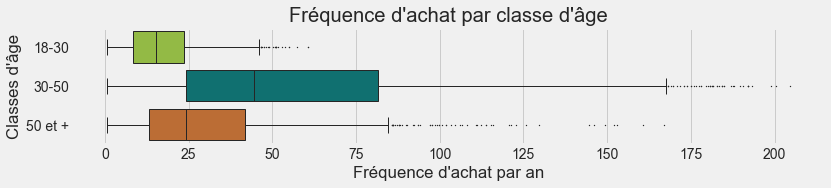

In [135]:
colors = [ 'chocolate', 'teal', 'yellowgreen']
plt.figure(figsize=(12,2))
plt.title("Fréquence d'achat par classe d'âge")
sns.boxplot(x=age_freq["Fréquence d'achat par an"], y=age_freq["classe d'âge"], palette=colors, flierprops = dict(markersize = 0.5), linewidth=1)
plt.gca().invert_yaxis()
plt.ylabel("Classes d'âge")
plt.savefig('Boxplot Age-Fréquence.png', bbox_inches='tight')
plt.show()

<br>
Tests de normalité:

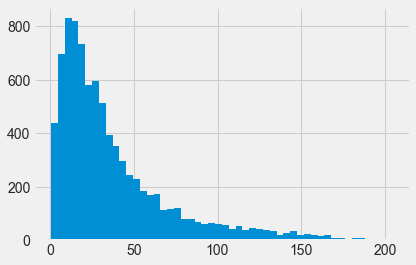

In [136]:
plt.hist(age_freq['Fréquence d\'achat par an'], bins = 50)
plt.show()

In [137]:
stats.anderson(age_freq['Fréquence d\'achat par an'])

AndersonResult(statistic=467.26369642572354, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [138]:
stats.kstest(age_freq['Fréquence d\'achat par an'], 'norm')

KstestResult(statistic=0.978379467500749, pvalue=0.0)

<font color='green'>
On peut rejeter H0 ("la distribution de la variable suit une loi normale"). t-test inutile ici.
</font>

<br>
Test des variances:

In [139]:
freq_18_30 = age_freq.loc[age_freq["classe d'âge"] == '18-30'] ["Fréquence d'achat par an"]
freq_30_50 = age_freq.loc[age_freq["classe d'âge"] == '30-50'] ["Fréquence d'achat par an"]
freq_50_plus = age_freq.loc[age_freq["classe d'âge"] == '50 et +'] ["Fréquence d'achat par an"]

In [140]:
stats.levene(freq_18_30, freq_30_50, freq_50_plus)

LeveneResult(statistic=967.1533739130953, pvalue=0.0)

<font color='green'>
On peut rejeter H0 ("les 3 échantillons sont de même variance"). ANOVA inutile ici.
</font>

<br>
Test non-paramétrique Kruskal-Wallis:

In [141]:
stats.kruskal(freq_18_30, freq_30_50, freq_50_plus)

KruskalResult(statistic=2049.1206389794843, pvalue=0.0)

<font color='green'>
On peut rejeter l'hypothèse nulle. Les valeurs médianes de fréquence des 3 groupes sont différentes
    <br>
    <br>
<font>

>> ### Lien âge / panier moyen:

In [142]:
panier_moy = pd.DataFrame(ventes_ss4_ss_oct.groupby(['session_id', "classe d'âge", 'client_id'])['price'].sum())

In [143]:
panier_moy = panier_moy.reset_index()

In [144]:
panier_moy = pd.DataFrame(panier_moy.groupby(['client_id', "classe d'âge"])['price'].mean())

In [145]:
panier_moy = panier_moy.reset_index()

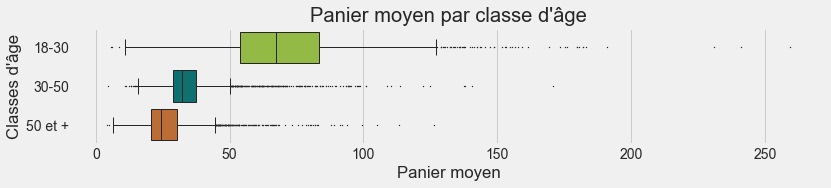

In [146]:
colors = [ 'chocolate', 'teal', 'yellowgreen']
plt.figure(figsize=(12,2))
plt.title("Panier moyen par classe d'âge")
sns.boxplot(x=panier_moy['price'], y=panier_moy["classe d'âge"], palette=colors, flierprops = dict(markersize = 0.5), linewidth=1)
plt.gca().invert_yaxis()
plt.xlabel("Panier moyen")
plt.ylabel("Classes d'âge")
plt.savefig('Boxplot Age-Panier.png', bbox_inches='tight')
plt.show()

<br>
Tests de normalité:

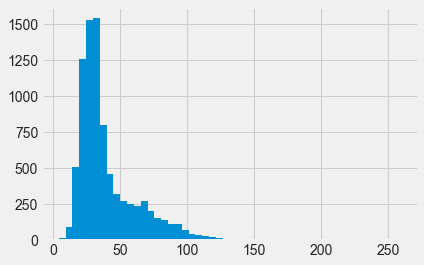

In [161]:
plt.hist(panier_moy['price'], bins = 50)
plt.show()

In [147]:
stats.anderson(panier_moy['price'])

AndersonResult(statistic=494.9640404304755, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [148]:
stats.kstest(panier_moy['price'], 'norm')

KstestResult(statistic=0.9999833762362703, pvalue=0.0)

<font color='green'>
On peut rejeter H0 ("la distribution de la variable suit une loi normale"). t-test inutile ici.
</font>

<br>
Test des variances:

In [149]:
panier_18_30 = panier_moy.loc[panier_moy["classe d'âge"] == '18-30'] ['price']
panier_30_50 = panier_moy.loc[panier_moy["classe d'âge"] == '30-50'] ['price']
panier_50_plus = panier_moy.loc[panier_moy["classe d'âge"] == '50 et +'] ['price']

In [150]:
stats.levene(panier_18_30, panier_30_50, panier_50_plus)

LeveneResult(statistic=738.6106591457852, pvalue=1.002864124475557e-296)

<font color='green'>
On peut rejeter H0 ("les 3 échantillons sont de même variance"). ANOVA inutile ici.
</font>

<br>
Test non-paramétrique Kruskal-Wallis:

In [151]:
stats.kruskal(panier_18_30, panier_30_50, panier_50_plus)

KruskalResult(statistic=4636.442142754686, pvalue=0.0)

<font color='green'>
On peut rejeter l'hypothèse nulle. Les valeurs médianes de fréquence des 3 groupes sont différentes
    <br>
    <br>
<font>

>> ### Lien âge / catégorie:

In [152]:
categ_18_30 = ventes_ss4_ss_oct.loc[ventes_ss4_ss_oct["classe d'âge"]=='18-30']
categ_30_50 = ventes_ss4_ss_oct.loc[ventes_ss4_ss_oct["classe d'âge"]=='30-50']
categ_50_plus = ventes_ss4_ss_oct.loc[ventes_ss4_ss_oct["classe d'âge"]=='50 et +']

In [153]:
categ_18_30 = pd.DataFrame(categ_18_30.groupby('categ')["classe d'âge"].count())
categ_30_50 = pd.DataFrame(categ_30_50.groupby('categ')["classe d'âge"].count())
categ_50_plus = pd.DataFrame(categ_50_plus.groupby('categ')["classe d'âge"].count())

In [154]:
categ_18_30=categ_18_30.reset_index()
categ_30_50=categ_30_50.reset_index()
categ_50_plus=categ_50_plus.reset_index()

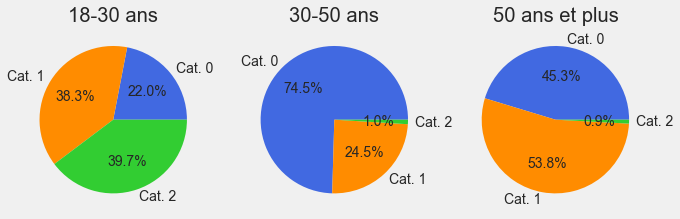

In [155]:
colors = ['royalblue', 'darkorange', 'limegreen']
labels = ['Cat. 0', 'Cat. 1', 'Cat. 2']
plt.figure(figsize=(10,4))
plt.subplot(1, 3, 1)
plt.title('18-30 ans')
plt.pie(categ_18_30["classe d'âge"], labels=labels, autopct = '%0.1f%%', colors=colors)
plt.subplot(1, 3, 2)
plt.title('30-50 ans')
plt.pie(categ_30_50["classe d'âge"], labels=labels, autopct = '%0.1f%%', colors=colors)
plt.subplot(1, 3, 3)
plt.title('50 ans et plus')
plt.pie(categ_50_plus["classe d'âge"], labels=labels, autopct = '%0.1f%%', colors=colors)
plt.savefig("Pie Age-Cat.png", bbox_inches='tight')
plt.show()

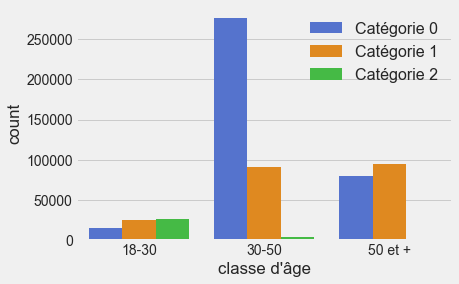

In [156]:
sns.countplot(x=ventes_ss4_ss_oct["classe d'âge"].sort_values(), hue=ventes_ss4_ss_oct['categ'], palette=colors)
plt.legend(('Catégorie 0','Catégorie 1', 'Catégorie 2'), loc="upper right", fontsize=16)
plt.show()

In [157]:
cont_age_cat = pd.crosstab(ventes_ss4_ss_oct["classe d'âge"], ventes_ss4_ss_oct['categ'])
cont_age_cat

categ,0,1,2
classe d'âge,,,
18-30,14753,25721,26674
30-50,276121,90648,3642
50 et +,79730,94736,1501


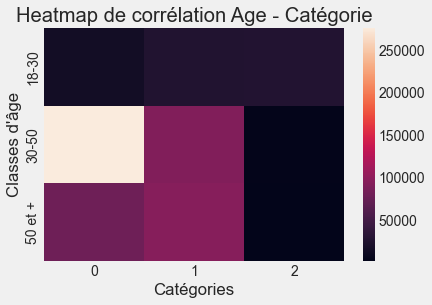

In [159]:
sns.heatmap(cont_age_cat)
plt.title('Heatmap de corrélation Age - Catégorie')
plt.xlabel('Catégories')
plt.ylabel("Classes d'âge")
plt.savefig("Heat Age-Cat.png", bbox_inches='tight')
plt.show()

In [160]:
stats.chi2_contingency(cont_age_cat)

(238990.61637115217,
 0.0,
 4,
 array([[ 40561.14556188,  23104.60932381,   3482.24511431],
        [223748.94991247, 127452.8123584 ,  19209.23772913],
        [106293.90452564,  60547.57831779,   9125.51715657]]))

<font color='green'>
On peut rejeter l'hypothèse nulle ("Les variables sont indépendantes"). Les variables âge et catégorie sont dépendantes.
</font>